In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation

C:\Users\austi\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [97]:
import numpy as np
import pandas as pd
from pprint import pprint
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("data/Speed-Dating-Data.csv", encoding="windows-1252")

In [4]:
dropping = ["idg", "condtn", "position", "positin1", "field", "undergra", "mn_sat", "tuition", "from", "zipcode", "career",
           "exphappy", "attr4_1", "sinc4_1", "intel4_1", "fun4_1", "amb4_1", "shar4_1"]
x = data.drop(columns=dropping)

pprint(x["date_3"].sum())

1498.0


In [5]:
x["age"].head()

0    21.0
1    21.0
2    21.0
3    21.0
4    21.0
Name: age, dtype: float64

In [6]:
training = pd.DataFrame(data, columns=["match", "int_corr", "samerace", "age_o", "age"])

In [7]:
training.head()

,match,int_corr,samerace,age_o,age
0,0,0.14,0,27.0,21.0
1,0,0.54,0,22.0,21.0
2,1,0.16,1,22.0,21.0
3,1,0.61,0,23.0,21.0
4,1,0.21,0,24.0,21.0


In [70]:
print(training.shape)
print(training.dropna().shape)

(8378, 5)
(8148, 5)


In [67]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(training)
X

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [71]:
training = training.dropna()
p = 0.9
n = len(training)

In [72]:
train = training[:int(n*p)]
test = training[int(n*p):]

In [73]:
y_train = train["match"].values
X_train = train.drop(columns="match").values

y_test = test["match"].values
X_test = test.drop(columns="match").values

In [74]:
X_train.shape

(7333, 4)

In [84]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='random_normal', input_dim=4))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [85]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics =['accuracy'])

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 11        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [87]:
hist = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
7333/7333 [==============================] - 1s 183us/step - loss: 0.5043 - acc: 0.8272
Epoch 2/5
7333/7333 [==============================] - 1s 70us/step - loss: 0.4496 - acc: 0.8332
Epoch 3/5
7333/7333 [==============================] - 0s 67us/step - loss: 0.4497 - acc: 0.8332
Epoch 4/5
7333/7333 [==============================] - 0s 65us/step - loss: 0.4499 - acc: 0.8332
Epoch 5/5
7333/7333 [==============================] - 1s 69us/step - loss: 0.4497 - acc: 0.8332


In [88]:
y_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [92]:
model.evaluate(X_test, y_test)

815/815 [==============================] - 0s 64us/step


[0.41941038187296115, 0.8539877302076188]

In [93]:
classes = model.predict(X_test, batch_size=128)

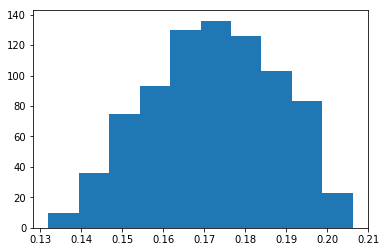

In [98]:
plt.hist(classes)
plt.show()

In [83]:
y_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)